In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def factorial(n):
    F = [1]
    for i in range (1,int(n+1)):
        F.append(i*F[i-1])
    return F

In [3]:
def cg_coeff1(j1, j2, m1, m2, j):
    F = factorial(20)

    m = m1 + m2
    
    a = math.sqrt((2*j+1)*F[int(j+j1-j2)]*F[int(j-j1+j2)]*F[int(j1+j2-j)]*F[int(j+m)]*F[int(j-m)]*F[int(j1-m1)]*F[int(j1+m1)]*F[int(j2-m2)]*F[int(j2+m2)]/F[int(j1+j2+j+1)])
    k_max = min((j1+j2-j),(j1-m1),(j2+m2))
    k_min = -min(0,(j-j2+m1),(j-j1-m2))
    b = 0
    for k in range(int(k_min), int(k_max+1)):
        b = b + ((-1)**k)/(F[int(k)]*F[int(j1+j2-j-k)]*F[int(j1-m1-k)]*F[int(j2+m2-k)]*F[int(j-j2+m1+k)]*F[int(j-j1-m2+k)])
    return (a*b)


(0.0, 0.9)

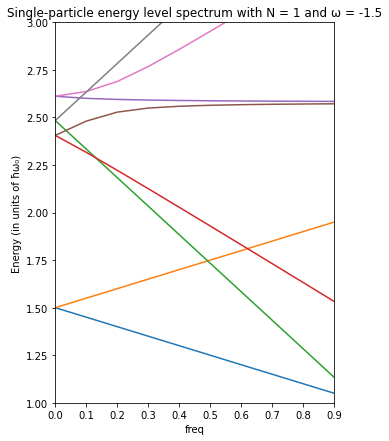

In [4]:
N_max = 1

freq_list = [x/10 for x in range(0,10,1)]

kap = 0.05
mu = [0,0,0,0.35,0.625,0.63,0.448,0.434]

plt.figure(figsize=(5,7))
ax = plt.gca()
delta = 0.1

for N in range (N_max+1):
    for i in range (-N-1,N+1):
        om = -(i+0.5)
        l_list = []
        lam_list = []
        sig_list = []
        H = []

        # Calculate basis for given value of N and om

        for l in range (N,-1,-2):
            for lam in range (-l, l+1):
                sig = om - lam
                if (abs(abs(sig)-0.5)<0.001):
                    l_list.append(l)
                    lam_list.append(lam)
                    sig_list.append(sig)

        # Calculate the hamiltonian matrix, <i|H|j>

        nbas = len(l_list)
        for freq in freq_list:
            H.append([])
            #fdel = ((((1+delta/3)**(2))*(1-2*delta/3))**(-1/3))
            fdel = ((((1+2*delta/3)**(2))*(1-4*delta/3))**(-1/6))
            #hw0 = hw00*fdel
            hw0 = 1
            hw00 = 1/fdel
            #A = 100
            #hw00 = 41*(A**(-1/3))
            #hw00 = 1
            C = -kap*2*hw00
            D = C*mu[N]/2.0
            for i in range(nbas):
                H[-1].append([])
                li = l_list[i]
                lami = lam_list[i]
                sigi = sig_list[i]
                for j in range (nbas):
                    lj = l_list[j]
                    lamj = lam_list[j]
                    sigj = sig_list[j]

                    if (i==j):
                        h00 = (N+1.5)*hw0
                        hl2 = D*lj*(lj+1)
                        hls = C*lamj*sigj
                        hr2 = N+1.5
                    else:
                        h00 = 0
                        hl2 = 0
                    if (abs(li-lj)<0.001):
                        if (abs(lami-lamj-1)<0.001)and (abs(sigi-sigj+1)<0.001):
                            hls = C*0.5*math.sqrt((lj-lamj)*(lj+lamj+1))
                        elif (abs(lami-lamj+1)<0.001)and (abs(sigi-sigj-1)<0.001):
                            hls = C*0.5*math.sqrt((lj+lamj)*(lj-lamj+1))
                    else:
                        hls = 0
                    if (abs(lami-lamj)<0.001) and (abs(sigi-sigj)<0.001):
                        hY0 = cg_coeff1(lj, 2, lamj, 0, li)*cg_coeff1(lj, 2, 0, 0, li)*math.sqrt((2*lj+1)/(2*li+1))
                        if (abs(li-lj+2)<0.001):
                            hr2 = math.sqrt((N-lj+2)*(N+lj+1))
                        elif (abs(li-lj-2)<0.001):
                            hr2 = math.sqrt((N-lj)*(N+lj+3))
                    else:
                        hr2 = 0
                        hY0 = 0
                    hdelta = -delta*hw0*(2/3)*hr2*hY0
                    hcrank = -hw0*freq*om
                    H[-1][-1].append(h00+hdelta+hls+hl2+hcrank)
                    #print(h00, hls, hl2, hr2, hY0, hdelta, fdel)
            #print(np.array(H[-1]), delta)

        # Diagonalise H

        diagH = []
        diagHs = []
        for i in range (len(H)):
            P, diag = Matrix(H[i]).diagonalize()
            diagH.append(np.diagonal(diag))

            diagHs.append(sorted(np.diagonal(diag).tolist()))
            #print(np.array(H[i]),delta_list[i], diagH[-1])
        diagH = np.array(diagH)
        diagHs = np.array(diagHs)

        # Plotting

        ls_list = ['s', 'p', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
        ax.set_xlim([-0.1, 1.1])
        ax.set_ylim([1,3])
        plt.title('Single-particle energy level spectrum with N = {} and ω = {}'.format(N, om))#, fontsize = 30)
        plt.ylabel('Energy (in units of ħω\u2080)')#, fontsize = 30)
        #plt.ylabel('Energy (in units of ħω\u2080\u2070)', fontsize = 30)
        plt.xlabel('freq')#, fontsize = 30)
        for i in range(len(l_list)):
            y = diagHs[:,i].tolist()
            plt.plot(freq_list, y)
plt.xlim(0,0.9)